Import stuff

In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import the file once

In [2]:
df = pd.read_csv('training_set_VU_DM_2014.csv')

In [3]:
print (df.columns)

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [4]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [5]:
print (df.describe())

            srch_id       site_id  visitor_location_country_id  \
count  4.958347e+06  4.958347e+06                 4.958347e+06   
mean   1.663666e+05  9.953133e+00                 1.753405e+02   
std    9.611223e+04  7.646890e+00                 6.591625e+01   
min    1.000000e+00  1.000000e+00                 1.000000e+00   
25%    8.293600e+04  5.000000e+00                 1.000000e+02   
50%    1.665070e+05  5.000000e+00                 2.190000e+02   
75%    2.497240e+05  1.400000e+01                 2.190000e+02   
max    3.327850e+05  3.400000e+01                 2.310000e+02   

       visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
count            251866.000000         252988.000000     4.958347e+06   
mean                  3.374334            176.022659     1.739739e+02   
std                   0.692519            107.254493     6.834525e+01   
min                   1.410000              0.000000     1.000000e+00   
25%                   2.920000          

In [6]:
print (df['price_usd'].describe())
print (df['price_usd'].nlargest(20))

count    4.958347e+06
mean     2.542096e+02
std      1.600124e+04
min      0.000000e+00
25%      8.500000e+01
50%      1.220000e+02
75%      1.849600e+02
max      1.972633e+07
Name: price_usd, dtype: float64
1168566    19726328.00
680748     11818011.00
3117007     9381308.71
1168574     5444467.00
2945135     4973355.00
1168576     4884239.00
1168562     4339792.00
1168580     4260887.00
4172824     4216286.00
1168581     3905813.00
1168583     3905813.00
1168578     3779565.00
2945143     3748123.00
3116994     3682007.90
3117004     3272895.58
3117002     3255043.32
1168564     3235118.00
2945150     3138525.00
2945152     3038092.00
3116991     3027428.18
Name: price_usd, dtype: float64


There are outliers in prices, look at the difference between the 75% and the max.
19726328 seems a bit much for one night

Little overview.

In [7]:
print (df.head(80))

    srch_id            date_time  site_id  visitor_location_country_id  \
0         1  2013-04-04 08:32:15       12                          187   
1         1  2013-04-04 08:32:15       12                          187   
2         1  2013-04-04 08:32:15       12                          187   
3         1  2013-04-04 08:32:15       12                          187   
4         1  2013-04-04 08:32:15       12                          187   
5         1  2013-04-04 08:32:15       12                          187   
6         1  2013-04-04 08:32:15       12                          187   
7         1  2013-04-04 08:32:15       12                          187   
8         1  2013-04-04 08:32:15       12                          187   
9         1  2013-04-04 08:32:15       12                          187   
10        1  2013-04-04 08:32:15       12                          187   
11        1  2013-04-04 08:32:15       12                          187   
12        1  2013-04-04 08:32:15      

In [8]:
for i in df.columns:
    print ("---- %s ---" % i)
    print (df[i].value_counts())

---- srch_id ---
244169    38
149527    38
223395    38
250956    38
205230    37
77827     37
289360    37
313784    37
18010     37
216579    37
329684    37
158400    37
240149    37
87970     37
103906    37
140485    37
55214     37
199641    37
312060    37
211227    37
20060     37
60367     37
69052     37
6611      37
42558     37
101748    36
249242    36
224719    36
190202    36
202437    36
          ..
115328     5
283433     5
189439     5
290773     5
282577     5
78725      5
96978      5
264831     5
201665     5
191952     5
309216     5
57155      5
242382     5
233257     5
86237      5
19191      5
151326     5
324410     5
38759      5
280572     5
86926      5
310554     5
149308     5
118638     5
314644     5
194346     5
204271     5
228835     5
149306     5
324148     5
Name: srch_id, Length: 199795, dtype: int64
---- date_time ---
2012-11-02 14:04:51    95
2012-12-26 10:59:30    87
2013-05-15 18:39:51    70
2012-11-23 07:28:55    69
2013-06-16 10:43:33    

Name: prop_review_score, dtype: int64
---- prop_brand_bool ---
1    3147060
0    1811287
Name: prop_brand_bool, dtype: int64
---- prop_location_score1 ---
0.00    273229
0.69    251968
1.10    227912
1.39    216682
1.61    207619
1.79    175564
1.95    156271
2.08    148716
2.20    129997
2.30    129661
2.40    118447
2.48    106235
2.56    104787
2.64     92192
2.71     87014
2.89     82758
2.77     74621
2.83     72344
2.94     68657
3.09     54465
3.04     51862
3.00     49315
3.14     44812
3.30     36819
3.26     35662
3.43     34976
3.47     34704
3.22     33896
3.50     33387
3.18     32430
         ...  
6.33       454
6.55       444
6.95       440
6.72       415
6.53       410
6.74       327
6.73       317
6.64       303
6.61       287
6.71       273
6.77       253
6.68       237
6.85       232
6.38       225
6.60       196
6.59       191
6.52       175
6.67       171
6.65       154
6.78       136
6.54       132
6.56       122
6.58       122
6.97        97
6.98        69
6.66 

-6.1394     198
-6.2064     183
-6.6835     176
-6.2856     171
-6.9845     165
-6.3825     163
-5.9054     160
-6.5074     159
-5.9845     152
-6.0815     140
-5.7804     134
-5.6623     128
-6.0303     128
-5.6421     115
-5.5696     114
-5.8706     112
-5.7058     109
-5.7541     109
-5.8384     108
-5.6835     107
-5.4932     103
-5.8085     101
-5.6228      97
-5.9432      96
-5.3511      95
-5.7293      81
-5.5374      80
-5.4531      79
-5.5866      79
-5.4660      77
           ... 
-54.9164      1
-49.8770      1
-29.9638      1
-32.5315      1
-29.8487      1
-13.0515      1
-31.2442      1
-58.2797      1
-15.9708      1
-10.0457      1
-16.6500      1
-8.1249       1
-13.5821      1
-30.9446      1
-29.7862      1
-31.0683      1
-10.7180      1
-36.2280      1
-33.9334      1
-24.7711      1
-26.5032      1
-32.9022      1
-19.4048      1
-32.5940      1
-46.1873      1
-46.0627      1
-7.4879       1
-34.1535      1
-34.0965      1
-35.0345      1
Name: srch_query_affinit

 0.0    203203
 1.0     79088
-1.0     33057
Name: comp7_rate, dtype: int64
---- comp7_inv ---
 0.0    318201
 1.0     33938
-1.0      4283
Name: comp7_inv, dtype: int64
---- comp7_rate_percent_diff ---
11.0     9811
10.0     9215
5.0      8836
2.0      7152
9.0      6497
8.0      5849
6.0      5801
4.0      5492
17.0     5084
3.0      4918
7.0      4907
12.0     4900
14.0     4267
15.0     4155
13.0     3993
16.0     3948
20.0     3693
18.0     3052
19.0     2947
25.0     2414
24.0     2330
21.0     2072
22.0     2049
23.0     1863
26.0     1388
33.0     1290
28.0     1286
27.0     1244
29.0     1100
30.0     1016
         ... 
628.0       1
629.0       1
532.0       1
527.0       1
518.0       1
517.0       1
429.0       1
432.0       1
437.0       1
441.0       1
442.0       1
448.0       1
450.0       1
451.0       1
465.0       1
467.0       1
468.0       1
475.0       1
476.0       1
480.0       1
482.0       1
485.0       1
494.0       1
495.0       1
501.0       1
504.0       1

Some conclusions:

199795 unique Search_id

198615 unique Date_time : Different than search_id so we can't connect them as the same.

34 unique site_id, and the absolute majority on website 5.

210 countries from visitors

Only 312 visitors have a history in rating stars.

7799 unique values of visitor_hist_adr_usd, mean price of last booked accomodations.

Properties from 172 countries were being checked.

129113 properties, where there are a lot of properties checked only once, differences are huge.

Most properties have 3 stars: 1947598, then 4 stars: 1521448, then 2 stars: 895894, then 5 stars: 406485, then 0: 169572, then 1: 17350.

Most properties got 4 review stars, then 4,5 then 3,5 then 3, then 5, then 0.0, then 2,5, then 1,5 then 1.0.

More properties (3147060) are part of a brand than not (1811287).

It seems that the higher the desirability of a properties location the less numbers there are.

Historical price 0.0 is highest is number, possiblity is a ot of properties are new on the site. Most properties seem to focus on 5 dollar a night, least seem to do less than 3. Possibility here is a skewed distrubution from very low, to very high to low again in prices. As in the head and tail the expensive properties are missing.

At position (our test variable) differences between position are small.

Most properties are given by around 100 euros a night, and least are around 600 euros a night or more expensive.
More properties are with promotion (3889229) than without (1069118).

---- srch_destination_id ---, For me hard to interpret. Search destination id where the search was performed, however the id's don't seem to look like country id, so this is different.

Most people search for 1 night, then 2, then 3. Nothing shocking. Difference between 1 and 2 is quite big.
1     2143980
2     1203153
3      717298
4      373594
5      185744

Most searches for 2 adults, then 1, then 4. 2 stands high on top.

2    3246234
1    1156861
4     242176
3     239029
6      31043

Most without children, then some.

0    3811774
1     675701
2     386976
3      58080
4      19829

Most for 1 room:
1    4520212
2     369152
3      47656
4      12175

Most searches for a saturday night:
1    2490145
0    2468202


---- srch_query_affinity_score --- Something to discuss. The log of the probability that a property is clicked on. Transform this variable?

Most people search for really low distances, like as if they are already in the same city.

Most people didn't booked the property

---- booking_bool ---
0    4819957
1     138390

Some questions that arise:

Do many people go in the same country from where they are from? As the first 3 of visitor location and property locations are the same, the possiblity seems big.

How many families?
    With 2 adults and at least 1 child.
    With 1 adult and at least 1 child.

Are there booking done by children?

Which properties have been booked a lot? popular?

Which properties most booked from which site id?

Which properties booked from which kind of families?


In [9]:
df_bysearches = df.groupby('srch_id')['site_id', 'visitor_location_country_id', 'prop_country_id', 'srch_adults_count', 'srch_children_count', 'price_usd'].mean()
print (df_bysearches.head(10))

         site_id  visitor_location_country_id  prop_country_id  \
srch_id                                                          
1           12.0                        187.0            219.0   
4            5.0                        219.0            219.0   
6           14.0                        100.0            100.0   
8            5.0                        219.0            219.0   
11           5.0                        219.0            219.0   
12           5.0                        219.0            158.0   
17          18.0                        129.0             31.0   
21          15.0                         55.0            216.0   
25           5.0                        219.0            219.0   
28           5.0                        219.0            219.0   

         srch_adults_count  srch_children_count   price_usd  
srch_id                                                      
1                      4.0                  0.0  163.718929  
4                    

At least we can compute now the unique searches on websites, the amount of families, and the amount of searches for within same country.

In [10]:
print (df_bysearches['site_id'].value_counts())

5.0     121844
14.0     19350
15.0     12716
24.0     10090
32.0      7074
18.0      5434
16.0      3870
12.0      3165
19.0      2012
22.0      1837
9.0       1809
11.0      1417
7.0       1313
29.0      1250
31.0      1130
26.0       669
4.0        553
25.0       531
23.0       505
1.0        503
34.0       417
10.0       392
13.0       356
17.0       259
2.0        243
27.0       229
28.0       187
30.0       172
21.0       151
3.0        149
6.0        127
33.0        33
20.0         7
8.0          1
Name: site_id, dtype: int64


In [11]:
print (df_bysearches['srch_adults_count'].value_counts())

2.0    128997
1.0     47280
4.0     10192
3.0     10001
6.0      1370
5.0      1239
8.0       464
7.0       199
9.0        53
Name: srch_adults_count, dtype: int64


In [12]:
df_bysearches['coupleofwithatleastonechild'] = np.where((df_bysearches['srch_adults_count'] == 2) & (df_bysearches['srch_children_count'] > 0), 1, 0)
print (df_bysearches['coupleofwithatleastonechild'].value_counts())

0    169507
1     30288
Name: coupleofwithatleastonechild, dtype: int64


In [13]:
df_bysearches['adultgroups'] = np.where((df_bysearches['srch_adults_count'] > 2), 1, 0)
print (df_bysearches['adultgroups'].value_counts())

0    176277
1     23518
Name: adultgroups, dtype: int64


In [14]:
df_bysearches['adultgroupswithchildren'] = np.where((df_bysearches['srch_adults_count'] > 2) & (df_bysearches['srch_children_count'] > 0), 1, 0)
print (df_bysearches['adultgroupswithchildren'].value_counts())

0    192762
1      7033
Name: adultgroupswithchildren, dtype: int64


In [15]:
df_bysearches['samecountryasdestination'] = np.where((df_bysearches['prop_country_id'] == df_bysearches['visitor_location_country_id']), 1, 0)
print (df_bysearches['samecountryasdestination'].value_counts())

1    126200
0     73595
Name: samecountryasdestination, dtype: int64


In [17]:
df_bysiteid = df.groupby('site_id').count()
print (df_bysiteid.head(10))

         srch_id  date_time  visitor_location_country_id  \
site_id                                                    
1          10943      10943                        10943   
2           5540       5540                         5540   
3           3487       3487                         3487   
4          13499      13499                        13499   
5        3086006    3086006                      3086006   
6           2522       2522                         2522   
7          32067      32067                        32067   
8             31         31                           31   
9          42171      42171                        42171   
10          9360       9360                         9360   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
site_id                                                                   
1                            374                   374            10943   
2                             30                    30

In [19]:
df_byproperty = df.groupby('prop_id').count() # ! Count, so amount of times things happen
print (df_byproperty.head(10))

         srch_id  date_time  site_id  visitor_location_country_id  \
prop_id                                                             
1             61         61       61                           61   
2             11         11       11                           11   
3             82         82       82                           82   
4             22         22       22                           22   
5             30         30       30                           30   
6             10         10       10                           10   
7              7          7        7                            7   
8              5          5        5                            5   
9             17         17       17                           17   
10             2          2        2                            2   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
prop_id                                                                   
1                    

In [20]:
# Most booked properties
print (df_byproperty['booking_bool'].nlargest(10))

prop_id
104517    2357
124342    2355
68420     2285
40279     2275
134154    2257
137997    2247
59781     2245
60846     2237
49656     2230
77089     2230
Name: booking_bool, dtype: int64


In [24]:
df_bypropertyprice = df.groupby('prop_id')['price_usd', 'gross_bookings_usd', 'position'].mean() # ! Mean price, however with outliers yet
print (df_bypropertyprice['price_usd'].nlargest(10))
print (df_bypropertyprice['gross_bookings_usd'].nlargest(10))
print (df_bypropertyprice['position'].nsmallest(10))

prop_id
130892    1.173038e+06
117454    7.439296e+05
133141    6.770081e+05
3143      6.546329e+05
38965     6.174457e+05
107901    5.425629e+05
88058     4.932976e+05
34096     4.872598e+05
33994     4.836010e+05
37772     4.799657e+05
Name: price_usd, dtype: float64
prop_id
110811    80487.250000
73335     60355.870000
54332     23763.650000
104890    21446.876667
25765     20238.720000
94901     15596.900000
132115    14890.690000
88531     13452.645000
42326     10674.960000
127392    10209.350000
Name: gross_bookings_usd, dtype: float64
prop_id
27      1.0
71      1.0
373     1.0
572     1.0
765     1.0
1185    1.0
1444    1.0
1528    1.0
1692    1.0
1821    1.0
Name: position, dtype: float64


In [68]:
print (df.groupby('prop_id')['price_usd', 'gross_bookings_usd'].mean())

           price_usd  gross_bookings_usd
prop_id                                 
1          94.874426                 NaN
2          96.272727          540.000000
3         109.026098          264.870000
4         468.611818         3782.130000
5         636.521333                 NaN
6          46.498000                 NaN
7         139.577143                 NaN
8          56.676000                 NaN
9          85.034118                 NaN
10        159.050000                 NaN
11        126.257786          281.035000
12         91.316667                 NaN
13         66.366667                 NaN
14         39.840000                 NaN
15         68.891978          115.685000
16        253.050172                 NaN
17         30.795000                 NaN
18         70.079231                 NaN
19         33.700000                 NaN
20        124.610000                 NaN
21        206.000000                 NaN
22        138.550000                 NaN
24         92.43

In [29]:
grouped = df.groupby(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance'])
groupdescribe = grouped['booking_bool'].agg([np.sum, np.mean, np.std, len])
print (groupdescribe)

# In [59]:
# grouppedDescribe = groupped['is_booking'].agg([np.sum, np.mean, np.std, len])

                                                                                                                                                                                                                                                                                                                                                                                                                            sum  \
srch_id site_id visitor_location_country_id prop_country_id prop_id prop_starrating prop_review_score prop_brand_bool prop_location_score1 prop_location_score2 prop_log_historical_price position price_usd promotion_flag srch_destination_id srch_length_of_stay srch_booking_window srch_adults_count srch_children_count srch_room_count srch_saturday_night_bool srch_query_affinity_score orig_destination_distance        
74      5       219                         219             21198   4               4.5               1               3.69                 0.0343               5.

In [25]:
print (df.columns)

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [37]:
print (df.groupby(['site_id', 'prop_id'])['booking_bool'].mean())\

site_id  prop_id
1        15         1.000000
         16         0.000000
         24         0.000000
         75         0.000000
         143        0.000000
         174        0.000000
         264        0.000000
         378        0.000000
         419        0.000000
         474        0.000000
         543        0.000000
         556        0.000000
         558        0.000000
         578        0.000000
         600        0.000000
         609        0.333333
         620        0.000000
         659        0.000000
         674        0.000000
         676        0.000000
         701        0.000000
         750        0.000000
         836        0.000000
         849        0.000000
         885        0.000000
         901        0.000000
         910        0.000000
         911        0.000000
         964        0.000000
         975        0.000000
                      ...   
34       139921     0.000000
         139974     0.000000
         140021     0.0000

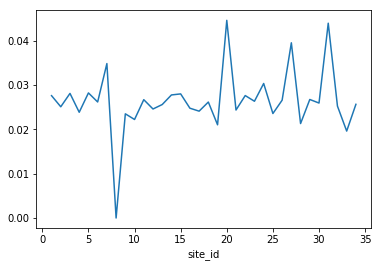

In [40]:
df.groupby('site_id')['booking_bool'].mean().plot() # Most (chance) of bookings happening on a site

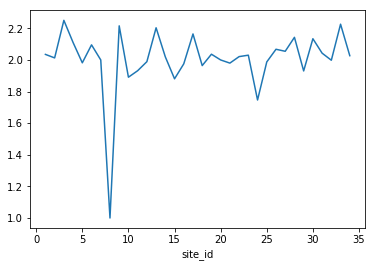

In [42]:
df.groupby('site_id')['srch_adults_count'].mean().plot()

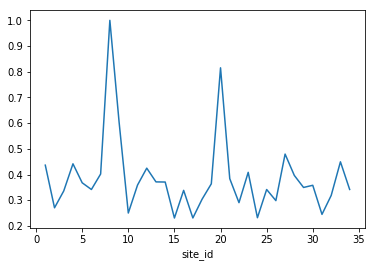

In [43]:
df.groupby('site_id')['srch_children_count'].mean().plot() 
# Apparently one website between 5 and 10 is focused on children accomodations

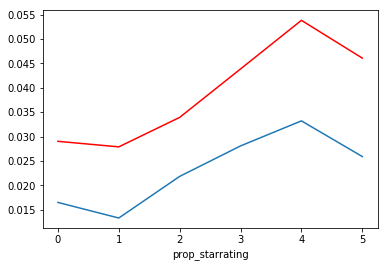

In [50]:
df.groupby('prop_starrating')['booking_bool'].mean().plot()
# Around 4 stars most booked
df.groupby('prop_starrating')['click_bool'].mean().plot(color='red')

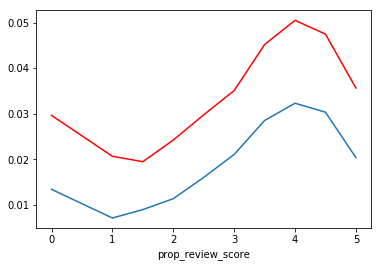

In [51]:
df.groupby('prop_review_score')['booking_bool'].mean().plot()
df.groupby('prop_review_score')['click_bool'].mean().plot(color='red')

In [6]:
dfcorr = df[['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool','click_bool', 'gross_bookings_usd',
       'booking_bool']]
print (dfcorr.corr())

                              srch_id   site_id  visitor_location_country_id  \
srch_id                      1.000000  0.003331                    -0.006097   
site_id                      0.003331  1.000000                    -0.305921   
visitor_location_country_id -0.006097 -0.305921                     1.000000   
visitor_hist_starrating     -0.010462  0.309078                    -0.256252   
visitor_hist_adr_usd         0.000316  0.099104                    -0.073231   
prop_country_id             -0.005468 -0.312593                     0.482787   
prop_id                     -0.000166  0.002943                     0.000432   
prop_starrating             -0.001577  0.174845                    -0.112911   
prop_review_score           -0.002959 -0.071645                     0.064279   
prop_brand_bool             -0.003828 -0.196217                     0.182405   
prop_location_score1         0.000439  0.178399                    -0.121392   
prop_location_score2         0.002368  0

!.

Visitor location country and property country have correlation of .48.

Visitor hist starrating have a correlation of .498 with visitor hist_adr_usd.

Length of stay and gross booking usd correlated for .44

Booking bool and clicking bool for 78% correlated.



Conclusions: People look for mainly hotels in same country and with a low distance!

Nothing shocking


In [4]:
dfpromotionandbooking = df[['promotion_flag','position', 'click_bool', 'gross_bookings_usd',
       'booking_bool']]
print (dfpromotionandbooking.corr())

                    promotion_flag  position  click_bool  gross_bookings_usd  \
promotion_flag            1.000000 -0.103621    0.039440            0.048785   
position                 -0.103621  1.000000   -0.164992            0.005909   
click_bool                0.039440 -0.164992    1.000000                 NaN   
gross_bookings_usd        0.048785  0.005909         NaN            1.000000   
booking_bool              0.036047 -0.147918    0.782889                 NaN   

                    booking_bool  
promotion_flag          0.036047  
position               -0.147918  
click_bool              0.782889  
gross_bookings_usd           NaN  
booking_bool            1.000000  


In [11]:
dfproperty2 = df.groupby('prop_id')['prop_starrating', 'prop_review_score', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag'].mean()
print(dfproperty2)
print(dfproperty2.corr())

         prop_starrating  prop_review_score  prop_review_score  \
prop_id                                                          
1                    2.0                0.0                0.0   
2                    0.0                4.0                4.0   
3                    3.0                3.5                3.5   
4                    5.0                4.5                4.5   
5                    0.0                0.0                0.0   
6                    3.0                0.0                0.0   
7                    0.0                5.0                5.0   
8                    3.0                4.0                4.0   
9                    2.0                3.0                3.0   
10                   4.0                5.0                5.0   
11                   4.0                4.0                4.0   
12                   3.0                4.5                4.5   
13                   0.0                0.0                0.0   
14        

Brands better reviewed than non-brands

In [ ]:
print(list(df.groupby(['position','click_bool', 'gross_bookings_usd','booking_bool'])))


KeyboardInterrupt: 

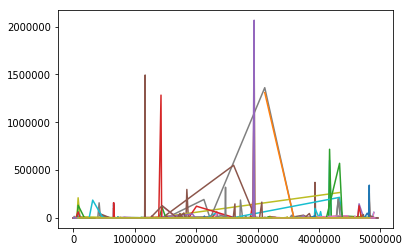

In [13]:
df['price_usd'].groupby(df['prop_id']).plot()
# Idea to account for price_usd for every property, however laptop doesn't take this well

In [11]:
print(df.groupby('prop_country_id')['price_usd'].mean())

prop_country_id
1       220.120526
2       125.353742
4       134.791621
7       126.335000
9       118.846294
10       55.815318
11       87.458716
13      207.145100
14      131.169863
15      237.693003
16      157.491582
17      263.426041
18      243.025223
19      108.573750
20      385.210533
21      199.298143
22      154.980011
23      256.016815
25      107.192571
26      147.149042
27      326.106861
30      284.078563
31      176.630143
32      472.286891
33      238.760225
34     8800.066852
35      139.062392
37      108.084035
38       86.180538
39     3470.307228
          ...     
194     123.527566
195     185.964307
196     107.629038
197     958.789474
200     107.853730
201     131.281694
202    1509.195171
203      92.693208
204     160.800000
205     615.992866
206     538.829432
207     124.874742
208     179.862308
211    1520.938973
212     143.394792
213     155.977694
214     200.519941
215     150.673835
216     305.642143
217     142.826667
219     198.164

In [15]:
print(df.columns)

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [18]:
#When booked, what was the average distance and the median.
print (df.groupby('booking_bool')['orig_destination_distance'].mean())
print (df.groupby('booking_bool')['orig_destination_distance'].median())

booking_bool
0    1302.500194
1    1257.238093
Name: orig_destination_distance, dtype: float64
booking_bool
0    387.29
1    358.25
Name: orig_destination_distance, dtype: float64


In [22]:
# When searched for length of stay, which properties were most booked.
print (df.groupby(['srch_length_of_stay', 'prop_id'])['booking_bool'].describe())
# Laptop couldn't handle

KeyboardInterrupt: 

In [23]:

from statistics import mode

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix  

In [3]:
dftest = df['booking_bool']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 50 columns):
srch_id                        int64
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_bool       int64
srch_query_affinity_sc

In [7]:
# df = df.drop('date_time', axis=1)
df = df.drop('click_bool', axis = 1)
df = df.drop('booking_bool', axis = 1)
df = df.drop('gross_bookings_usd', axis =1)

In [21]:
print (dftest.shape)
print (df.shape)
print (dftest2.shape)

(4958347,)
(4958347, 49)
(4959183, 49)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 49 columns):
srch_id                        int64
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_bool       int64
srch_query_affinity_score      float64
orig_destination_dis

In [19]:
df = df.drop('position', axis = 1)

In [27]:
df.shape
dftest2.shape

(4959183, 49)

In [9]:
df = df.drop('position', axis=1)

In [12]:
df = df.fillna(0)
dftest2 = dftest2.fillna(0)

In [4]:
dftest2 = pd.read_csv('test_set_VU_DM_2014.csv')
dftest2 = dftest2.drop('date_time', axis=1)

In [22]:
dftest2 = dftest2.drop('date_time', axis=1)

ValueError: labels ['date_time'] not contained in axis

In [24]:
lr = LogisticRegression()
lr.fit(df, dftest)
y_pred = lr.predict(dftest2)
acc_log = round(lr.score(df, dftest)*100, 2)
print (acc_log)

97.21


In [25]:
coeff_df = pd.DataFrame(df.columns)
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(lr.coef_[0])
coeff_df.sort_values('Correlation', ascending=False)
print (coeff_df)

                        Feature   Correlation
0                       srch_id -3.592181e-06
1                       site_id -2.246079e-03
2   visitor_location_country_id -4.254923e-03
3       visitor_hist_starrating -1.154641e-05
4          visitor_hist_adr_usd -3.893236e-04
5               prop_country_id -4.686970e-03
6                       prop_id -8.562667e-06
7               prop_starrating -4.417651e-04
8             prop_review_score -4.315466e-04
9               prop_brand_bool -3.759870e-05
10         prop_location_score1 -5.066779e-04
11         prop_location_score2  2.397298e-05
12    prop_log_historical_price -6.483046e-04
13                    price_usd -5.808019e-07
14               promotion_flag  1.584811e-05
15          srch_destination_id -4.335300e-05
16          srch_length_of_stay -5.222132e-04
17          srch_booking_window -5.946912e-03
18            srch_adults_count -2.924737e-04
19          srch_children_count -2.833678e-05
20              srch_room_count -1

In [26]:

decision_tree = DecisionTreeClassifier()

decision_tree.fit(df, dftest)

ydt = decision_tree.predict(dftest2)

acc_decision_tree = round(decision_tree.score(df, dftest) * 100, 2)

print (acc_decision_tree)



100.0


In [27]:


random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(df, dftest)

yrf = random_forest.predict(dftest2)

random_forest.score(df, dftest)

acc_random_forest = round(random_forest.score(df, dftest) * 100, 2)

print (acc_random_forest)

KeyboardInterrupt: 